<a href="https://colab.research.google.com/github/VanessaLima-analista/Analise-das-Plataformas-de-Streaming/blob/main/Analise_Netflix_%2B_Prime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória do Catálogo da Netflix e Prime



## Overview

Esse notebook visa praticar os aprendizados em tratamento e visualização de dados do nível 5 do programa "Vem pra Neuro, Mulher", pela profa. [Alessandra Araújo](https://www.linkedin.com/in/alessandrap-araujo/).

**Dados:**
- [Netlix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)
- [Amazon Prime Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows)

**Etapas:**
1. Importando Bibliotecas
2. Leitura dos Arquivos
3. Conhecendo os dados
4. Tratando os dados
5. Juntando dataframes
6. Medidas estatísticas

## Importando Bibliotecas

Importando as bibliotecas necessárias para a análise do projeto.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # chamando somente uma parte da biblioteca
import seaborn as sns

## Leitura dos arquivos

###Importando do computador

In [ ]:
#df_netflix = pd.read_csv('/content/netflix_titles.csv')

###Importando do Google Drive


In [ ]:
df_netflix = pd.read_csv('/content/drive/MyDrive/Vem pra neuro mulher/Nível 5/netflix_titles.csv')
df_amazon = pd.read_csv('/content/drive/MyDrive/Vem pra neuro mulher/Nível 5/amazon_prime_titles.csv')

In [ ]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df_netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df_amazon.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [ ]:
df_amazon.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


## Conhecendo nossos dados

In [ ]:
# Trazer estatísticas do nosso dataframe

df_netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Observação:

Coluna "duration" pode ser vista como numérica, mas ela apresenta dados em dois formatos diferentes (números de temporadas para séries e tempo de duração para filmes).

Pensar em melhor forma de tratar esses dados.

In [ ]:
df_netflix.info() # Conhecer valores não nulos e tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df_netflix.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
df_netflix.duplicated().sum() # Verificar se há registros duplicados

np.int64(0)

In [ ]:
df_netflix.isnull().sum() # Verificar se há dados nulos

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Observação II:

Não podemos preencher as informações nulas, mas podemos tratar para que fiquem com algum texto ou valor.

## Tratando os dados

In [ ]:
df_netflix = df_netflix.rename(columns={'listed_in':'category'})

In [ ]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Filmes

Criando novo dataframe somente com FILMES


#### Netflix

In [ ]:
df_netflix_movies = df_netflix[df_netflix['type'] == 'Movie']

In [ ]:
df_netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
df_netflix_movies['duration'] = df_netflix_movies['duration'].str.replace(' min','')

<ipython-input-17-6d0e7b724e46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_movies['duration'] = df_netflix_movies['duration'].str.replace(' min','')


In [ ]:
df_netflix_movies.isnull().sum()

,0
show_id,0
type,0
title,0
director,188
cast,475
country,440
date_added,0
release_year,0
rating,2
duration,3


In [ ]:
df_netflix_movies[df_netflix_movies['duration'].isnull()] # invetigando valores nulos

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df_netflix_movies['duration'] = df_netflix_movies['duration'].astype(float)

<ipython-input-20-87fcb1ae600f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_movies['duration'] = df_netflix_movies['duration'].astype(float)


In [ ]:
df_netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       6131 non-null   object 
 1   type          6131 non-null   object 
 2   title         6131 non-null   object 
 3   director      5943 non-null   object 
 4   cast          5656 non-null   object 
 5   country       5691 non-null   object 
 6   date_added    6131 non-null   object 
 7   release_year  6131 non-null   int64  
 8   rating        6129 non-null   object 
 9   duration      6128 non-null   float64
 10  category      6131 non-null   object 
 11  description   6131 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 751.7+ KB


In [ ]:
df_netflix_movies.describe()

,release_year,duration
count,6131.000000,6128.000000
mean,2013.121514,99.577187
std,9.678169,28.290593
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [ ]:
df_netflix_movies['date_added'] = pd.to_datetime(df_netflix_movies['date_added'])
df_netflix_movies['date_added'] = df_netflix_movies['date_added'].dt.date

<ipython-input-23-73d8523545b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_movies['date_added'] = pd.to_datetime(df_netflix_movies['date_added'])
<ipython-input-23-73d8523545b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_movies['date_added'] = df_netflix_movies['date_added'].dt.date


In [ ]:
df_netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       6131 non-null   object 
 1   type          6131 non-null   object 
 2   title         6131 non-null   object 
 3   director      5943 non-null   object 
 4   cast          5656 non-null   object 
 5   country       5691 non-null   object 
 6   date_added    6131 non-null   object 
 7   release_year  6131 non-null   int64  
 8   rating        6129 non-null   object 
 9   duration      6128 non-null   float64
 10  category      6131 non-null   object 
 11  description   6131 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 751.7+ KB


In [ ]:
df_netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
df_netflix_movies[df_netflix_movies['rating'].isnull()] # invetigando valores nulos

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37.0,Movies,Oprah Winfrey sits down with director Ava DuVe...
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115.0,Dramas,"Amid the chaos and horror of World War II, a c..."


#### Amazon

In [ ]:
df_amazon_movies = df_amazon[df_amazon['type'] == 'Movie']

In [ ]:
df_amazon_movies['duration'] = df_amazon_movies['duration'].str.replace(' min','').astype(float)

<ipython-input-28-646770d4fc32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_movies['duration'] = df_amazon_movies['duration'].str.replace(' min','').astype(float)


In [ ]:
df_amazon_movies['date_added'] = pd.to_datetime(df_amazon_movies['date_added'])
df_amazon_movies['date_added'] = df_amazon_movies['date_added'].dt.date

<ipython-input-29-49f8e7463d7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_movies['date_added'] = pd.to_datetime(df_amazon_movies['date_added'])
<ipython-input-29-49f8e7463d7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_movies['date_added'] = df_amazon_movies['date_added'].dt.date


In [ ]:
df_amazon_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7814 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7814 non-null   object 
 1   type          7814 non-null   object 
 2   title         7814 non-null   object 
 3   director      7585 non-null   object 
 4   cast          7050 non-null   object 
 5   country       569 non-null    object 
 6   date_added    16 non-null     object 
 7   release_year  7814 non-null   int64  
 8   rating        7483 non-null   object 
 9   duration      7814 non-null   float64
 10  listed_in     7814 non-null   object 
 11  description   7814 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 793.6+ KB


In [ ]:
df_amazon_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113.0,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110.0,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74.0,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69.0,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45.0,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [ ]:
df_amazon_movies.describe()

,release_year,duration
count,7814.000000,7814.000000
mean,2006.869977,91.311876
std,20.263072,40.333086
min,1920.000000,0.000000
25%,2004.000000,75.000000
50%,2015.000000,91.000000
75%,2019.000000,106.000000
max,2021.000000,601.000000


### Séries

Criando novo dataframe somente com SÉRIES

In [ ]:
df_netflix_shows = df_netflix[df_netflix['type'] == 'TV Show']

In [ ]:
df_netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [ ]:
df_netflix_shows['duration'] = df_netflix_shows['duration'].str.replace(' Seasons','')
df_netflix_shows['duration'] = df_netflix_shows['duration'].str.replace(' Season','').astype(int)

<ipython-input-35-dd4170edcac4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_shows['duration'] = df_netflix_shows['duration'].str.replace(' Seasons','')
<ipython-input-35-dd4170edcac4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_shows['duration'] = df_netflix_shows['duration'].str.replace(' Season','').astype(int)


In [ ]:
df_netflix_shows.describe()

,release_year,duration
count,2676.000000,2676.000000
mean,2016.605755,1.764948
std,5.740138,1.582752
min,1925.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,1.000000
75%,2020.000000,2.000000
max,2021.000000,17.000000


In [ ]:
df_netflix_shows['date_added'] = pd.to_datetime(df_netflix_shows['date_added'].str.strip())
df_netflix_shows['date_added'] = df_netflix_shows['date_added'].dt.date

<ipython-input-37-f112b4048bb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_shows['date_added'] = pd.to_datetime(df_netflix_shows['date_added'].str.strip())
<ipython-input-37-f112b4048bb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_shows['date_added'] = df_netflix_shows['date_added'].dt.date


In [ ]:
df_netflix_shows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2676 non-null   object
 1   type          2676 non-null   object
 2   title         2676 non-null   object
 3   director      230 non-null    object
 4   cast          2326 non-null   object
 5   country       2285 non-null   object
 6   date_added    2666 non-null   object
 7   release_year  2676 non-null   int64 
 8   rating        2674 non-null   object
 9   duration      2676 non-null   int64 
 10  category      2676 non-null   object
 11  description   2676 non-null   object
dtypes: int64(2), object(10)
memory usage: 271.8+ KB


In [ ]:
#df_netflix_shows['date_added'] = pd.to_datetime(df_netflix_shows['date_added'])

In [ ]:
df_netflix_movies[df_netflix_movies['duration'].isnull()] # invetigando valores nulos

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


## Agrupamento Filmes

In [ ]:
df_netflix_movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [ ]:
df_diretor_filme = df_netflix_movies.groupby('director')['title'].count().sort_values(ascending=False)

In [ ]:
df_diretor_filme.describe()

,title
count,4354.000000
mean,1.364952
std,1.089925
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,19.000000


In [ ]:
df_diretor_filme_filtrado = df_diretor_filme[df_diretor_filme > 5]

In [ ]:
df_diretor_filme_filtrado

,title
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Martin Scorsese,12
Youssef Chahine,12


In [ ]:
df_lancamento_filme = df_netflix_movies.groupby('release_year')['title'].count().sort_values(ascending=True)

In [ ]:
df_lancamento_filtrado = df_lancamento_filme[df_lancamento_filme > 11]

In [ ]:
df_lancamento_filtrado

,title
release_year,
1981,12
1984,12
1989,15
1988,16
1991,16
1982,17
1990,19
1992,20
1994,20


In [ ]:
df_lancamento_filme.describe()

,title
count,73.000000
mean,83.986301
std,176.961664
min,1.000000
25%,3.000000
50%,12.000000
75%,51.000000
max,767.000000


In [ ]:
df_netflix_movies.to_csv('df_netflix_movies.csv', index=False)

In [ ]:
from google.colab import files
#files.download('df_netflix_movies.csv')

## Join Netflix e Amazon

### Join Movies

In [ ]:
## Criando uma coluna chave para df Netflix

df_netflix_movies['title_id'] = df_netflix_movies['title'].str.lower().str.replace(' ','')

<ipython-input-52-01792baf48d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_movies['title_id'] = df_netflix_movies['title'].str.lower().str.replace(' ','')


In [ ]:
df_netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description,title_id
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",dickjohnsonisdead
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,mylittlepony:anewgeneration
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",sankofa
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,thestarling
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,jesuiskarl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96.0,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,zinzana
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158.0,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",zodiac
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,zombieland
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",zoom


In [ ]:
## Criando uma coluna chave para df Amazon

df_amazon_movies['title_id'] = df_amazon_movies['title'].str.lower().str.replace(' ','')

<ipython-input-54-3e203c47bf26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_movies['title_id'] = df_amazon_movies['title'].str.lower().str.replace(' ','')


In [ ]:
df_amazon_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_id
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113.0,"Comedy, Drama",A small fishing village must procure a local d...,thegrandseduction
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110.0,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,takecaregoodnight
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74.0,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,secretsofdeception
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69.0,Documentary,"Pink breaks the mold once again, bringing her ...",pink:stayingtrue
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45.0,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,monstermaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9660,s9661,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",NaN,NaT,2021,13+,96.0,Comedy,The Man in the Hat journeys through France in ...,themaninthehat
9662,s9663,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",NaN,NaT,2021,16+,93.0,"Drama, Science Fiction, Suspense","River is a grounded Sci-Fi mystery Thriller, t...",river
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaT,1940,7+,60.0,Comedy,New York City street principles get an East Si...,prideofthebowery
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaT,2008,R,90.0,Action,"In war-torn Eastern Europe, a world-weary grou...",outpost


In [ ]:
## Filmes em comum entre Amazon e Netflix

df_netflix_amazon_movies = pd.merge(df_netflix_movies, df_amazon_movies, on='title_id', how='inner')
df_netflix_amazon_movies

,show_id_x,type_x,title_x,director_x,cast_x,country_x,date_added_x,release_year_x,rating_x,duration_x,...,title_y,director_y,cast_y,country_y,date_added_y,release_year_y,rating_y,duration_y,listed_in,description_y
0,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106.0,...,Paranoia,Robert Luketic,"Harrison Ford, Liam Hemsworth, Amber Heard, Ga...",NaN,NaT,2013,PG-13,106.0,"Drama, Suspense",An entry-level employee at a powerful corporat...
1,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan",2021-09-16,2012,R,115.0,...,Safe House,Jeff Glickman,"Andrew Chapman, Leo Choy, Alex Hook, Deanna Li...",NaN,NaT,2021,18+,95.0,"Comedy, Suspense","On the verge of being fired, an FBI analyst se..."
2,s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",NaN,2021-09-03,2021,PG-13,119.0,...,Worth,Jenn Page,Eric Roberts,NaN,NaT,2021,13+,90.0,"Drama, Special Interest, Suspense",Johnny was a young seminary student who lost h...
3,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,2021-09-02,2017,TV-14,106.0,...,Gurgaon,Shanker Raman,"Pankaj Tripathi, Ragini Khanna, Akshay Oberoi,...",NaN,NaT,2017,13+,102.0,"Drama, Suspense",Nikki is jealous that his father considers his...
4,s140,Movie,Do the Right Thing,Spike Lee,"Danny Aiello, Ossie Davis, Ruby Dee, Richard E...",United States,2021-09-01,1989,R,120.0,...,Do the Right Thing,Spike Lee,"Danny Aiello, Ossie Davis, Ruby Dee, Richard E...",NaN,NaT,1989,R,121.0,"Comedy, Drama",Director Spike Lee's seminal exploration of ra...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,s8666,Movie,Urvi,Pradeep Verma,"Sruthi Hariharan, Shraddha Srinath, Shweta Pan...",India,2018-01-15,2017,TV-MA,121.0,...,Urvi,B.S.Pradeep Varma,"Shruthi Hariharan, Shraddha Srinath, Achyuth K...",NaN,NaT,2017,18+,122.0,"Drama, Suspense",A wall separates three woman from reaching the...
274,s8668,Movie,USS Indianapolis: Men of Courage,Mario Van Peebles,"Nicolas Cage, Tom Sizemore, Thomas Jane, Matt ...",United States,2019-09-25,2016,R,130.0,...,USS Indianapolis: Men of Courage,Mario Van Peebles,"Nicolas Cage, Matt Lanter, Thomas Jane, Tom Si...",NaN,NaT,2016,R,131.0,"Action, Drama","Nicolas Cage, Tom Sizemore and Thomas Jane sta..."
275,s8723,Movie,What Lies Beneath,Robert Zemeckis,"Harrison Ford, Michelle Pfeiffer, Diana Scarwi...",United States,2020-01-01,2000,PG-13,130.0,...,What Lies Beneath,Menno Meyjes,"Monic Hendrickx, Fedja van Huêt, Daan Schuurma...",NaN,NaT,2016,13+,95.0,Suspense,"After many years abroad, a woman's homecoming ..."
276,s8755,Movie,Wolves,Bart Freundlich,"Michael Shannon, Carla Gugino, Taylor John Smi...",United States,2019-03-29,2016,R,109.0,...,Wolves,David Hayter,"Jason Momoa, Lucas Till, Stephen McHattie, Mer...",NaN,NaT,2014,R,90.0,"Action, Horror, Science Fiction",A high-school student wakes to find he is chan...


In [ ]:
df_movies_concat = pd.concat([df_netflix_movies, df_amazon_movies])
df_movies_merge = pd.merge(df_netflix_movies, df_amazon_movies, on='title_id', how='outer')

In [ ]:
df_movies_concat

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description,title_id,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",dickjohnsonisdead,NaN
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,mylittlepony:anewgeneration,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",sankofa,NaN
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,thestarling,NaN
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,jesuiskarl,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9660,s9661,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",NaN,NaT,2021,13+,96.0,NaN,The Man in the Hat journeys through France in ...,themaninthehat,Comedy
9662,s9663,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",NaN,NaT,2021,16+,93.0,NaN,"River is a grounded Sci-Fi mystery Thriller, t...",river,"Drama, Science Fiction, Suspense"
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaT,1940,7+,60.0,NaN,New York City street principles get an East Si...,prideofthebowery,Comedy
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaT,2008,R,90.0,NaN,"In war-torn Eastern Europe, a world-weary grou...",outpost,Action


In [ ]:
df_movies_merge

,show_id_x,type_x,title_x,director_x,cast_x,country_x,date_added_x,release_year_x,rating_x,duration_x,...,title_y,director_y,cast_y,country_y,date_added_y,release_year_y,rating_y,duration_y,listed_in,description_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"""Mixed Up""",Nishi Chawla,"UDAY KRISHNA, BETHANY RISHELL, LUCY BOND, SANJ...",NaN,NaT,2020.0,16+,106.0,"Drama, Romance","""Mixed Up"" examines casual factors that make u..."
1,s2037,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,2020-09-08,2020.0,TV-MA,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s2305,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,2020-07-01,2019.0,TV-14,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s5973,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,2020-02-05,2020.0,TV-14,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s2482,Movie,#FriendButMarried,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2020-05-21,2018.0,TV-G,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13664,s5970,Movie,​Maj Rati ​​Keteki,Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,2018-09-15,2017.0,TV-14,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13665,s5971,Movie,​Mayurakshi,Atanu Ghosh,"Soumitra Chatterjee, Prasenjit Chatterjee, Ind...",India,2018-09-15,2017.0,TV-14,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13666,s4668,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,2018-09-01,2018.0,TV-14,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13667,s5023,Movie,반드시 잡는다,Hong-seon Kim,Baek Yoon-sik,South Korea,2018-02-28,2017.0,TV-MA,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Join Shows

In [ ]:
## Criando uma coluna chave para df Netflix

df_netflix_shows['title_id'] = df_netflix_shows['title'].str.lower().str.replace(' ','')

<ipython-input-60-78b338c3f162>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_shows['title_id'] = df_netflix_shows['title'].str.lower().str.replace(' ','')


In [ ]:
## Criando uma coluna chave para df Amazon

df_amazon_shows = df_amazon[df_amazon['type'] == 'TV Show']
df_amazon_shows['title_id'] = df_amazon_shows['title'].str.lower().str.replace(' ','')

<ipython-input-61-f15fda41b3f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_shows['title_id'] = df_amazon_shows['title'].str.lower().str.replace(' ','')


In [ ]:
## Shows em comum entre Amazon e Netflix

df_netflix_amazon_shows = pd.merge(df_netflix_shows, df_amazon_shows, on='title_id', how='inner')
df_netflix_amazon_shows

,show_id_x,type_x,title_x,director_x,cast_x,country_x,date_added_x,release_year_x,rating_x,duration_x,...,title_y,director_y,cast_y,country_y,date_added_y,release_year_y,rating_y,duration_y,listed_in,description_y
0,s88,TV Show,Titipo Titipo,NaN,"Jeon Hae-ri, Kim Eun-ah, Hong Bum-ki, Nam Do-h...",NaN,2021-09-10,2019,TV-Y,2,...,Titipo Titipo,NaN,NaN,NaN,NaN,2021,ALL,1 Season,"Animation, Kids",Titipo is the new train who just became offici...
1,s105,TV Show,Tayo the Little Bus,NaN,"Robyn Slade, Kami Desilets",South Korea,2021-09-06,2016,TV-Y,2,...,Tayo the Little Bus,NaN,NaN,NaN,NaN,2019,ALL,5 Seasons,"Documentary, Kids","""Tayo the Little Bus"" is about exciting advent..."
2,s190,TV Show,Bread Barbershop,NaN,"Um Sang-hyun, Park Yoon-hee, Kang Shi-hyun, Ho...",NaN,2021-08-28,2020,TV-Y,2,...,Bread Barbershop,NaN,NaN,NaN,NaN,2020,ALL,1 Season,"Animation, Kids",In a world where all the characters are differ...
3,s214,TV Show,RIDE ON TIME,NaN,"King & Prince, Hey! Say! JUMP, KAT-TUN, NEWS, ...",NaN,2021-08-27,2021,TV-PG,3,...,RIDE ON TIME,NaN,NaN,NaN,"August 27, 2021",2021,NR,3 Seasons,Documentary,Johnny's is the top male idol agency in Japan....
4,s270,TV Show,Winx Club,NaN,"Liza Jacqueline, Helena Evangeliou, Lisa Ortiz...",Italy,2021-08-15,2015,TV-Y7,2,...,Winx Club,NaN,"Haven Paschall, Jessica Paquet",NaN,NaN,2015,ALL,1 Season,"Animation, Kids","In their new adventure, the Winx travel in the..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,s8126,TV Show,Super Wings,NaN,"Luca Padovan, Evan Smolin, Junah Jang, Colin C...","United States, South Korea, China",2020-12-01,2020,TV-Y,3,...,Super Wings,NaN,"Chasden Gilson-Walker, Cassandra Lee Morris, B...",NaN,"August 29, 2021",2019,TV-Y,4 Seasons,"Animation, Kids",Super Wings is an action-packed upper-preschoo...
72,s8312,TV Show,The Fosters,NaN,"Teri Polo, Sherri Saum, Jake T. Austin, Hayden...",United States,2017-10-05,2017,TV-14,5,...,The Fosters,NaN,"Teri Polo, Sherri Saum, Hayden Byerly",NaN,NaN,2018,TV-14,5 Seasons,TV Shows,Tensions continue to rise in the drama's fifth...
73,s8358,TV Show,The Inbetweeners,NaN,"Simon Bird, James Buckley, Blake Harrison, Joe...",United Kingdom,2018-01-01,2010,TV-MA,3,...,The Inbetweeners,NaN,"Simon Bird, James Buckley, Blake Harrison, Joe...",NaN,NaN,2010,16+,3 Seasons,"Comedy, Young Adult Audience",The BAFTA award winning E4 comedy The Inbetwee...
74,s8685,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,2017-08-01,2016,TV-Y,3,...,Vroomiz,NaN,"Jung Hwa Yang, Sang Hyun Uhm, So Young Lee",NaN,NaN,2017,ALL,1 Season,"Animation, Kids",Vroomiz is a high-octane series that features ...


In [ ]:
df_shows_concat = pd.concat([df_netflix_shows, df_amazon_shows])
df_shows_merge = pd.merge(df_netflix_shows, df_amazon_shows, on='title_id', how='outer')

In [ ]:
df_shows_concat

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description,title_id,listed_in
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",blood&water,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,ganglands,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",jailbirdsneworleans,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,kotafactory,NaN
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,midnightmass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,s9652,TV Show,Glass Room,NaN,"Elizaveta Maiskaya, Vsevolod Boldin, Alexander...",NaN,NaN,2019,16+,1 Season,NaN,Geography teacher Elena lives with her husband...,glassroom,Drama
9655,s9656,TV Show,DaFUNdamentals Series,NaN,"Emile Crawford, Randall Crawford, Jon Ward",NaN,NaN,2021,TV-Y,1 Season,NaN,"Learn ""daFundamentals"" through song and fun ch...",dafundamentalsseries,"Animation, Kids"
9661,s9662,TV Show,Terrahawks,NaN,"DENISE BRYER, WINDSOR DAVIES, JEREMY HITCHEN, ...",NaN,NaN,1983,ALL,3 Seasons,NaN,"This thrilling, action-packed series saw Gerry...",terrahawks,TV Shows
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,NaN,"This is Earth, 2100AD - and these are the adve...",planetpatrol,TV Shows


In [ ]:
df_shows_merge

,show_id_x,type_x,title_x,director_x,cast_x,country_x,date_added_x,release_year_x,rating_x,duration_x,...,title_y,director_y,cast_y,country_y,date_added_y,release_year_y,rating_y,duration_y,listed_in,description_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"""The Paramedic Angel""",NaN,"Nate Reidnauer, Nikki Hrichak, Nina Randazzo, ...",NaN,NaN,2021.0,ALL,1 Season,Drama,The tragedy of a loving family man and paramed...
1,s2667,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020-04-17,2020.0,TV-MA,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,#IGotThis,NaN,NaN,NaN,NaN,2020.0,TV-PG,1 Season,Drama,Meet remarkable people who have discovered way...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,#IMomSoHard Live,NaN,"Kristin Hensley, Jen Smedley",NaN,NaN,2019.0,16+,1 Season,"Arts, Entertainment, and Culture",Comedians Kristin Hensley and Jen Smedley of t...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,#Lagira de #eldisco,NaN,NaN,NaN,NaN,2019.0,TV-G,1 Season,Music Videos and Concerts,Alejandro Sanz presents us on this occasion th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,s5975,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,2019-03-30,2016.0,TV-14,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4451,s2999,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,2020-01-23,2020.0,TV-14,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4452,s6178,TV Show,忍者ハットリくん,NaN,NaN,Japan,2018-12-23,2012.0,TV-Y7,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4453,s4915,TV Show,海的儿子,NaN,"Li Nanxing, Christopher Lee, Jesseca Liu, Appl...",NaN,2018-04-27,2016.0,TV-14,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Medidas estatíticas

In [ ]:
df_movies = df_movies_concat.drop_duplicates(subset=['title_id'])
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description,title_id,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",dickjohnsonisdead,NaN
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,mylittlepony:anewgeneration,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",sankofa,NaN
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,thestarling,NaN
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,jesuiskarl,NaN


In [ ]:
media_duracao_movies = df_movies['duration'].mean() ## Calculando média de duração dos filmes
mediana_duracao_movies = df_movies['duration'].median() ## Calculando mediana de duração dos filmes
std_duracao_movies = df_movies['duration'].std() ## Calculando desvio padrão de duração dos filmes
var_duracao_movies = df_movies['duration'].var() ## Calculando variância de duração dos filmes
print(f'Média: {media_duracao_movies}\nMediana: {mediana_duracao_movies}\nDesvio padrão: {std_duracao_movies}\nVariância: {var_duracao_movies}')

Média: 94.74701443329181
Mediana: 94.0
Desvio padrão: 35.91122823121356
Variância: 1289.6163130743098


In [ ]:
df_movies['duration'].quantile([0.25, 0.5, 0.75])

,duration
0.25,81.0
0.50,94.0
0.75,110.0


In [ ]:
duracao_min = df_movies['duration'].min()
duracao_max = df_movies['duration'].max()

print(f'Mínimo: {duracao_min}\nMáx: {duracao_max}')

Mínimo: 0.0
Máx: 601.0


In [ ]:
df_movies_min = df_movies[df_movies['duration'] == df_movies['duration'].min()]
df_movies_max = df_movies[df_movies['duration'] == df_movies['duration'].max()]

In [ ]:
df_movies = df_movies[df_movies['duration'] > 0] ## Removendo filmes com duração zero
df_movies['duration'].min()

1.0

In [ ]:
df_movies.describe()

,release_year,duration
count,13639.000000,13639.000000
mean,2009.662512,94.816482
std,16.781721,35.832593
min,1920.000000,1.000000
25%,2009.000000,81.000000
50%,2016.000000,94.000000
75%,2019.000000,110.000000
max,2021.000000,601.000000


In [ ]:
df_movies_max

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description,title_id,listed_in
933,s934,Movie,Soothing Surf at Del Norte for Sleep black screen,Mark Knight,NaN,NaN,NaT,2018,ALL,601.0,NaN,Black screen reduces the blue-spectrum light w...,soothingsurfatdelnorteforsleepblackscreen,Special Interest


## Encontrando Outliers

**MÉTODO IQR**

In [ ]:
Q1 = df_movies['duration'].quantile(0.25)
Q3 = df_movies['duration'].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1: {Q1}\nQ3: {Q3}\nIQR: {IQR}')

Q1: 81.0
Q3: 110.0
IQR: 29.0


In [ ]:
outliers_IQR = df_movies[(df_movies['duration'] < (Q1 - 1.5 * IQR)) | (df_movies['duration'] > (Q3 + 1.5 * IQR))]
outliers_IQR

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description,title_id,listed_in
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,2021-09-21,1996,TV-PG,161.0,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,avvaishanmughi,NaN
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166.0,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,jeans,NaN
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,2021-09-16,2021,PG,23.0,Documentaries,Robin Wiltshire's painful childhood was rescue...,myheroeswerecowboys,NaN
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,2021-09-14,2021,TV-Y,13.0,Children & Family Movies,Join the StoryBots and the space travelers of ...,astorybotsspaceadventure,NaN
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,2021-09-14,2018,TV-MA,182.0,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,kingofboys,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9557,s9558,Movie,Date Night: World Premiere,Shawn Levy,"Steve Carell, Tina Fey, Mark Wahlberg, Tara...",NaN,NaT,2010,NR,5.0,NaN,Date Night: World Premiere,datenight:worldpremiere,Comedy
9558,s9559,Movie,Date Night: Making a Scene,Shawn Levy,"Steve Carell, Tina Fey, Mark Wahlberg, Tara...",NaN,NaT,2010,NR,10.0,NaN,Date Night: Making a Scene,datenight:makingascene,Comedy
9564,s9565,Movie,A-Team: Life After Film School with Joe Carnahan,20th Century Fox,NaN,NaN,NaT,2010,PG-13,10.0,NaN,The A-Team is now available for download! A gr...,a-team:lifeafterfilmschoolwithjoecarnahan,"Action, Adventure, Comedy"
9638,s9639,Movie,Oven,Kishore Tummala,Lauren Ojeda,NaN,NaT,2019,7+,2.0,NaN,A young mom's lapse in attention leads to a ca...,oven,Drama


In [ ]:
df_movies_tratado_iqr = df_movies[(df_movies['duration'] >= (Q1 - 1.5 * IQR)) & (df_movies['duration'] <= (Q3 + 1.5 * IQR))]

In [ ]:
df_movies_tratado_iqr.describe()

,release_year,duration
count,12534.000000,12534.000000
mean,2009.518829,95.256024
std,16.994264,23.096430
min,1920.000000,38.000000
25%,2008.000000,83.000000
50%,2016.000000,94.000000
75%,2019.000000,109.000000
max,2021.000000,153.000000


**MÉTODO DESVIO PADRÃO**

In [ ]:
limite_superior = df_movies['duration'].mean() + 2 * df_movies['duration'].std()
limite_inferior = df_movies['duration'].mean() - 2 * df_movies['duration'].std()
print(f'Limite superior: {limite_superior}\nLimite inferior: {limite_inferior}')

Limite superior: 166.48166898250128
Limite inferior: 23.151295311068637


In [ ]:
outliers_std = df_movies[(df_movies['duration'] > limite_superior) | (df_movies['duration'] < limite_inferior)]
outliers_std

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description,title_id,listed_in
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,2021-09-16,2021,PG,23.0,Documentaries,Robin Wiltshire's painful childhood was rescue...,myheroeswerecowboys,NaN
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,2021-09-14,2021,TV-Y,13.0,Children & Family Movies,Join the StoryBots and the space travelers of ...,astorybotsspaceadventure,NaN
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,2021-09-14,2018,TV-MA,182.0,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,kingofboys,NaN
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",2021-09-01,1984,R,229.0,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,onceuponatimeinamerica,NaN
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,2021-08-01,1999,R,189.0,"Dramas, Independent Movies","Through chance, history and divine interventio...",magnolia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,s9531,Movie,The A Team: Making a Scene,Joe Carnahan,"Liam Neeson, Bradley Cooper, Sharlto Copley,...",NaN,NaT,2010,NR,10.0,NaN,The A-Team is now available for download! The ...,theateam:makingascene,"Action, Adventure, Comedy"
9557,s9558,Movie,Date Night: World Premiere,Shawn Levy,"Steve Carell, Tina Fey, Mark Wahlberg, Tara...",NaN,NaT,2010,NR,5.0,NaN,Date Night: World Premiere,datenight:worldpremiere,Comedy
9558,s9559,Movie,Date Night: Making a Scene,Shawn Levy,"Steve Carell, Tina Fey, Mark Wahlberg, Tara...",NaN,NaT,2010,NR,10.0,NaN,Date Night: Making a Scene,datenight:makingascene,Comedy
9564,s9565,Movie,A-Team: Life After Film School with Joe Carnahan,20th Century Fox,NaN,NaN,NaT,2010,PG-13,10.0,NaN,The A-Team is now available for download! A gr...,a-team:lifeafterfilmschoolwithjoecarnahan,"Action, Adventure, Comedy"


In [ ]:
df_movies_tratado_std = df_movies[(df_movies['duration'] <= limite_superior) & (df_movies['duration'] >= limite_inferior)]
df_movies_tratado_std

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description,title_id,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",dickjohnsonisdead,NaN
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,mylittlepony:anewgeneration,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",sankofa,NaN
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,thestarling,NaN
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,jesuiskarl,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9660,s9661,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",NaN,NaT,2021,13+,96.0,NaN,The Man in the Hat journeys through France in ...,themaninthehat,Comedy
9662,s9663,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",NaN,NaT,2021,16+,93.0,NaN,"River is a grounded Sci-Fi mystery Thriller, t...",river,"Drama, Science Fiction, Suspense"
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaT,1940,7+,60.0,NaN,New York City street principles get an East Si...,prideofthebowery,Comedy
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaT,2008,R,90.0,NaN,"In war-torn Eastern Europe, a world-weary grou...",outpost,Action


In [ ]:
df_movies_tratado = df_movies_tratado_iqr

<Axes: ylabel='duration'>

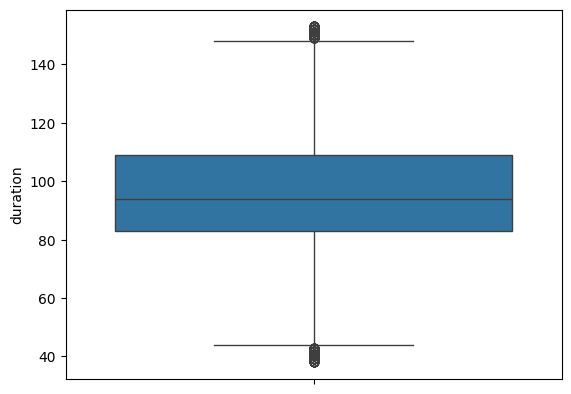

In [ ]:
sns.boxplot(df_movies_tratado['duration'])

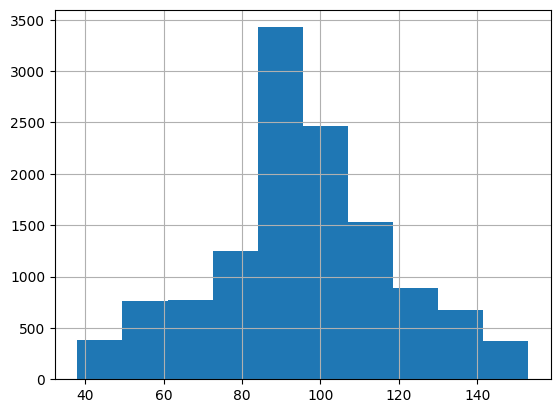

In [ ]:
df_movies_tratado['duration'].hist()
plt.show()

In [ ]:
director_counts = df_movies_tratado['director'].value_counts()
director_counts

,count
director,
Jay Chapman,42
Mark Knight,41
Manny Rodriguez,26
Jay Karas,21
Cannis Holder,20
...,...
Holger Tappe,1
Ahmed El Gendy,1
Brett Ratner,1


<Axes: xlabel='count', ylabel='Count'>

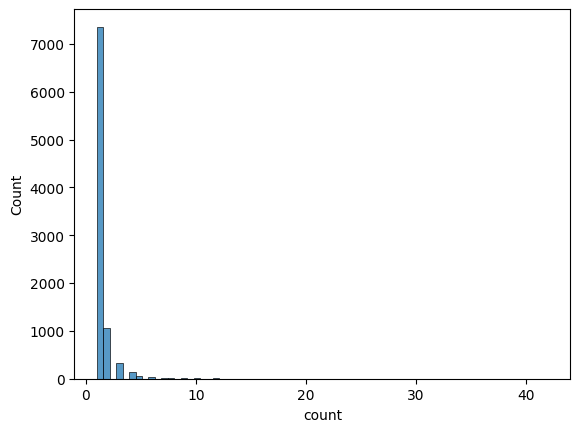

In [ ]:
sns.histplot(director_counts, bins=70)

## Correlação

In [ ]:
df_movies_tratado.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,float64


In [ ]:
df_movies_tratado[['duration', 'release_year']].corr()

,duration,release_year
duration,1.000000,0.042237
release_year,0.042237,1.000000


## Vizualizações


### Gráfico de linha

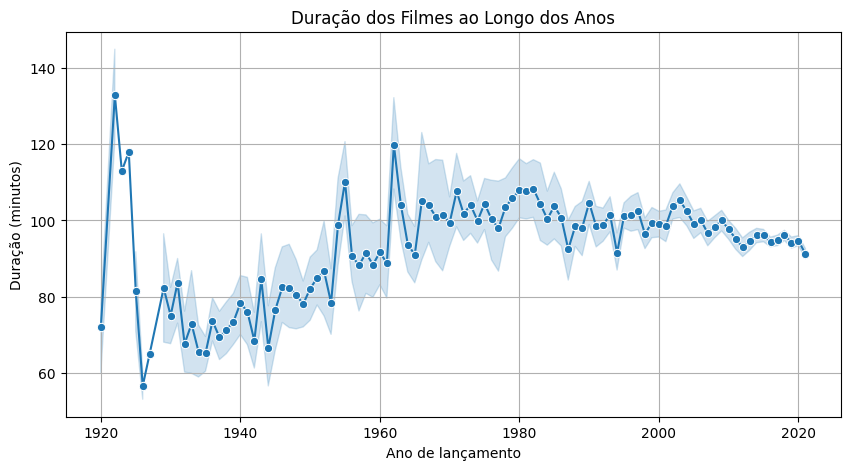

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='release_year', y='duration', data=df_movies_tratado, marker='o')

plt.xlabel('Ano de lançamento')
plt.ylabel('Duração (minutos)')
plt.title('Duração dos Filmes ao Longo dos Anos')

#plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Gráfico de dispersão

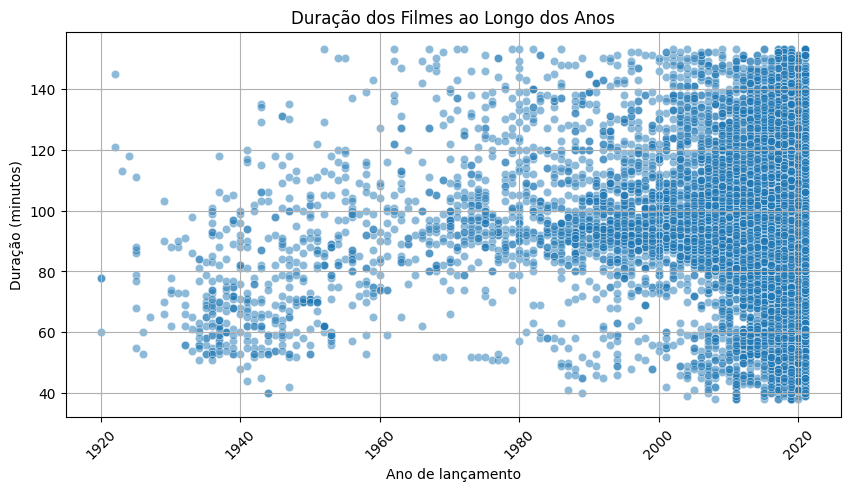

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='release_year', y='duration', data=df_movies_tratado, alpha=0.5)

plt.xlabel('Ano de lançamento')
plt.ylabel('Duração (minutos)')
plt.title('Duração dos Filmes ao Longo dos Anos')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Gráfico de pizza

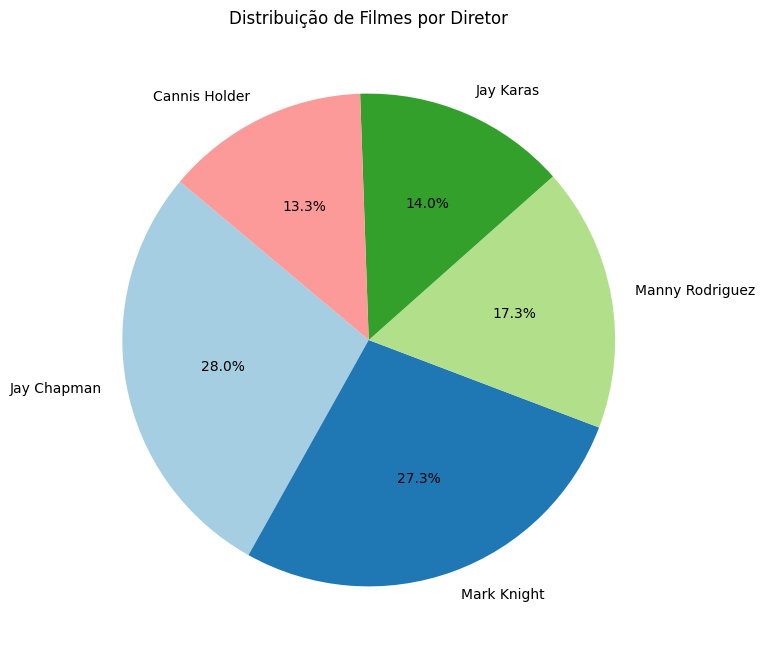

In [ ]:
# Contar a frequência de cada diretor
director_counts = df_movies_tratado['director'].value_counts().head(5)

# Criando gráfico
plt.figure(figsize=(8, 8))
plt.pie(director_counts, labels=director_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Distribuição de Filmes por Diretor')
plt.show()

### Gráfico de barras

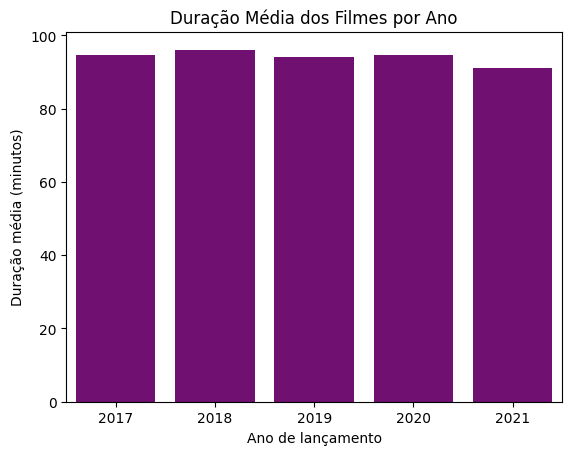

In [ ]:
media_por_ano = df_movies_tratado.groupby('release_year')['duration'].mean().reset_index()

sns.barplot(x='release_year', y='duration', data=media_por_ano.tail(5), color='purple')

plt.xlabel('Ano de lançamento')
plt.ylabel('Duração média (minutos)')
plt.title('Duração Média dos Filmes por Ano')

plt.show()